Import needed modules

In [26]:
import scipy.io as sio
import numpy as np
import os, sys

Path to test cases

In [27]:
path = '/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/test_cases'

In [28]:
file_list = os.listdir(path)    #This is a list of all of the .mat files

In [29]:
print file_list     #Just double checking...

['01.mat', '02.mat', '03.mat', '04.mat', '05.mat', '06.mat', '07.mat', '08.mat', '09.mat', '10.mat', '11.mat', '12.mat', '13.mat', '14.mat', '15.mat', '16.mat', '17.mat']


In [33]:
#THIS IS READY TO DO EVERY FILE INDIVIDUALLY
#for filename in file_list:
edit_path = path + '/' + file_list[0]

In [34]:
mat = sio.loadmat(edit_path)

In [35]:
num_array = mat['imDataParams']['images']
echo_times = mat['imDataParams']['TE']

##getting dimensions
nx, ny, nz, nc, ne = np.shape(num_array[0,0])
print "The dimensions are:" , nx, ny, nz, nc, ne

The dimensions are: 192 192 4 1 6


In [43]:
DixonApp_parent_folder = os.path.dirname(os.path.abspath('/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/berglund/QPBO/DixonApp'))
DixonApp_vtk_folder = DixonApp_parent_folder + "/vtk"
DixonApp_vtk_prefix_input  = 'DixonApp_Input'
DixonApp_vtk_prefix_output = 'DixonApp_Output'

In [36]:
vtk_max = 2^14-1

In [39]:
##get maximum values
max_real = np.amax(abs(np.real(num_array[0,0])))
imag_real = np.amax(abs(np.imag(num_array[0,0])))

if max_real > imag_real:
    images_max = max_real
else:
    images_max = imag_real

In [41]:
print "This is the MAX of the real # : " , max_real
print "This is the MAX of the imaginary # : " , imag_real
print "This is the MAX out of both # : " , images_max
print "-" * 100
print "These are the echo times: " , echo_times

 This is the MAX of the real # :  4.69632e+07
This is the MAX of the imaginary # :  5.52753e+07
This is the MAX out of both # :  5.52753e+07
----------------------------------------------------------------------------------------------------
These are the echo times:  [[ array([[ 0.001436,  0.003084,  0.004732,  0.00638 ,  0.008028,  0.009676]])]]


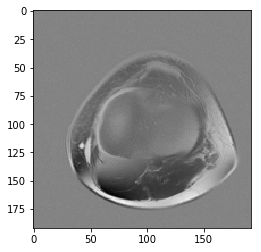

In [58]:
from matplotlib import pyplot as plt
plt.imshow(np.imag(sub_num2[:,:,0,0,0]), interpolation='nearest', cmap='gray')
plt.show()

In [54]:
#Attempting to get the values that are ultimately written in the file ----NOT FINISHED
sub_num2 = num_array[0,0]
for idx_echo in range(1,ne):
    image_re = np.real(sub_num2[:,:,:,:,idx_echo])*(vtk_max/images_max)
    image_im = np.imag(sub_num2[:,:,:,:,idx_echo])*(vtk_max/images_max)

    #vtk file names that have to be part of a loop
    vtk_filename_re = '%s/%s_echo%04d_re.vtk' % (DixonApp_vtk_folder, DixonApp_vtk_prefix_input, idx_echo)
    vtk_filename_im = '%s/%s_echo%04d_im.vtk' % (DixonApp_vtk_folder, DixonApp_vtk_prefix_input, idx_echo)

    print vtk_filename_re
    print vtk_filename_im
    #Now as part of the loop, write the vtk files,
    ## SO (one for the real and one for the imaginary ) for every iteration

/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/berglund/QPBO/vtk/DixonApp_Input_echo0001_re.vtk
/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/berglund/QPBO/vtk/DixonApp_Input_echo0001_im.vtk
/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/berglund/QPBO/vtk/DixonApp_Input_echo0002_re.vtk
/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/berglund/QPBO/vtk/DixonApp_Input_echo0002_im.vtk
/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/berglund/QPBO/vtk/DixonApp_Input_echo0003_re.vtk
/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/berglund/QPBO/vtk/DixonApp_Input_echo0003_im.vtk
/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/berglund/QPBO/vtk/DixonApp_Input_echo0004_re.vtk
/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3p